In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
mat = pd.read_csv("student-mat.csv")
por = pd.read_csv("student-por.csv")

In [3]:
mat.shape

(395, 33)

In [4]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
mat.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [6]:
mat.duplicated().sum()

np.int64(0)

In [7]:
por.shape

(649, 33)

In [8]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
por.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [10]:
por.duplicated().sum()

np.int64(0)

In [11]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


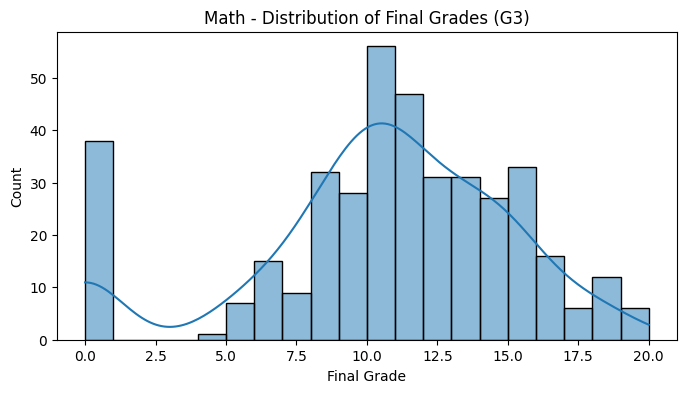

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(mat['G3'], bins=20, kde=True)
plt.title('Math - Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

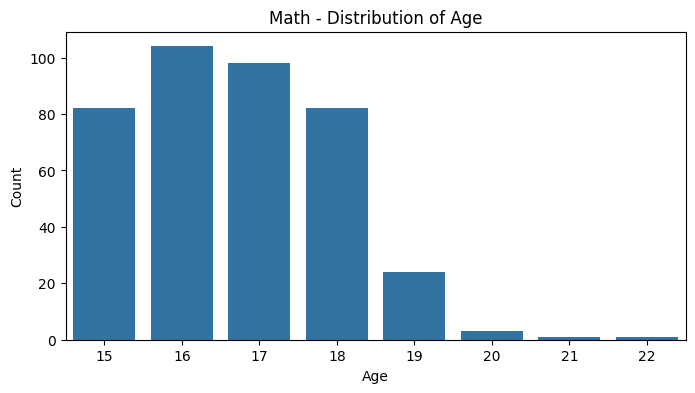

In [14]:
plt.figure(figsize=(8, 4))
age_counts = mat['age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Math - Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

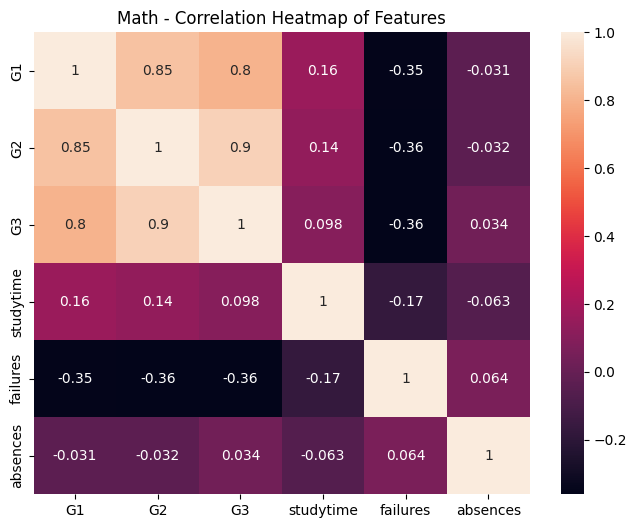

In [15]:
plt.figure(figsize=(8, 6))
numeric_features = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
corr = mat[numeric_features].corr()
sns.heatmap(corr, annot=True)
plt.title('Math - Correlation Heatmap of Features')
plt.show()

In [16]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [17]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


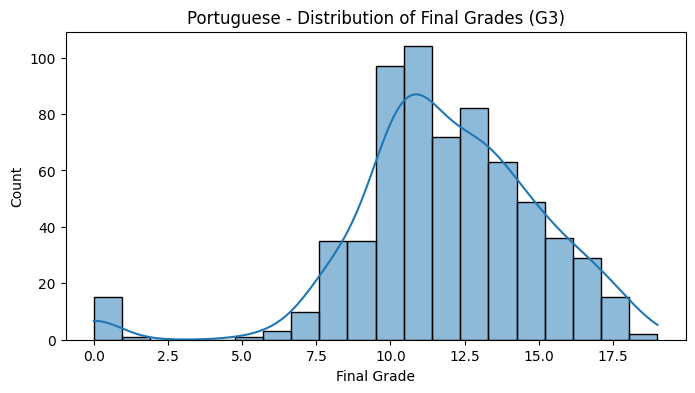

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(por['G3'], bins=20, kde=True)
plt.title('Portuguese - Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

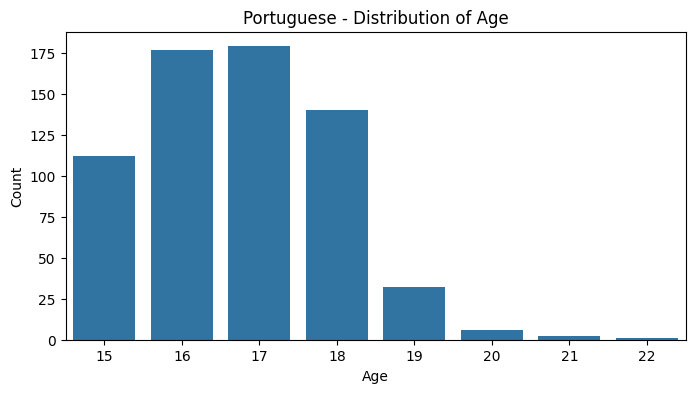

In [19]:
plt.figure(figsize=(8, 4))
age_counts = por['age'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Portuguese - Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

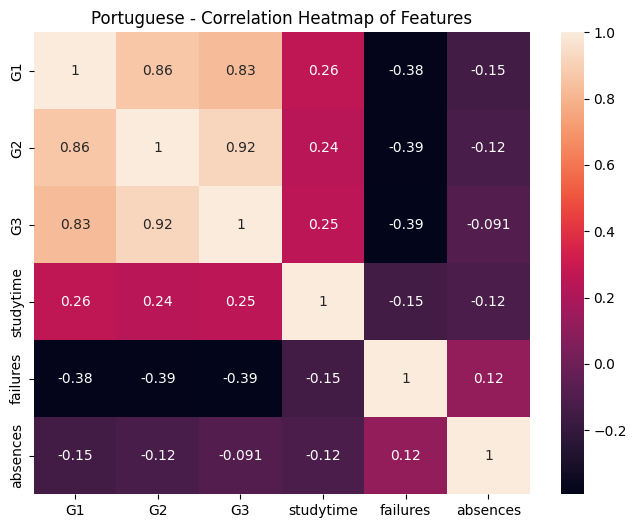

In [20]:
plt.figure(figsize=(8, 6))
numeric_features = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
corr = por[numeric_features].corr()
sns.heatmap(corr, annot=True)
plt.title('Portuguese - Correlation Heatmap of Features')
plt.show()

In [21]:
common_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
              'Mjob', 'Fjob', 'reason', 'guardian']

#Performing inner merge
merged = pd.merge(mat, por, on=common_cols, suffixes=('_math', '_por'), how='inner')

In [22]:
merged.shape

(383, 54)

In [23]:
merged.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           383 non-null    object
 1   sex              383 non-null    object
 2   age              383 non-null    int64 
 3   address          383 non-null    object
 4   famsize          383 non-null    object
 5   Pstatus          383 non-null    object
 6   Medu             383 non-null    int64 
 7   Fedu             383 non-null    int64 
 8   Mjob             383 non-null    object
 9   Fjob             383 non-null    object
 10  reason           383 non-null    object
 11  guardian         383 non-null    object
 12  traveltime_math  383 non-null    int64 
 13  studytime_math   383 non-null    int64 
 14  failures_math    383 non-null    int64 
 15  schoolsup_math   383 non-null    object
 16  famsup_math      383 non-null    object
 17  paid_math        383 non-null    ob

In [25]:
merged.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,16.592689,2.791123,2.543081,1.438642,2.036554,0.295039,3.953003,3.229765,3.127937,1.472585,...,3.953003,3.237598,3.125326,1.472585,2.279373,3.577023,3.652742,12.107050,12.219321,12.509138
std,1.171721,1.084505,1.086614,0.694609,0.843032,0.740844,0.922599,0.997091,1.147192,0.885400,...,0.908301,0.993933,1.146340,0.885400,1.283307,1.402576,4.889570,2.553414,2.474782,2.943498
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


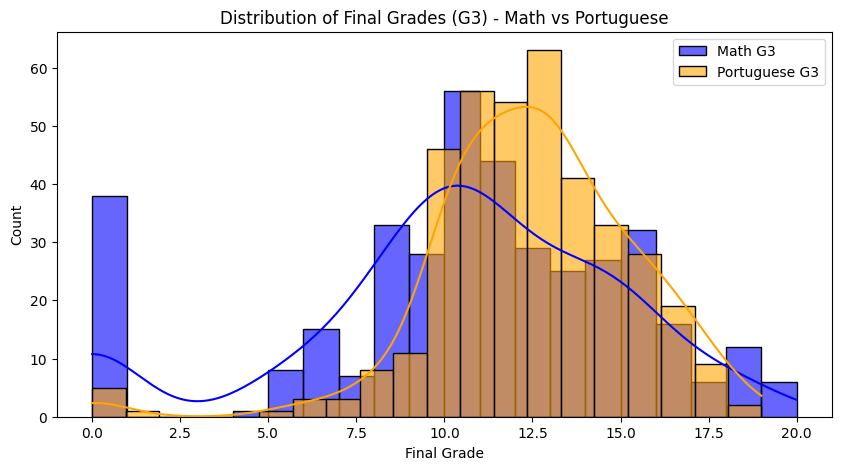

In [26]:
#Distribution of final grades (G3) for Math and Portuguese side-by-side
plt.figure(figsize=(10, 5))
sns.histplot(merged['G3_math'], color='blue', label='Math G3', kde=True, bins=20, alpha=0.6)
sns.histplot(merged['G3_por'], color='orange', label='Portuguese G3', kde=True, bins=20, alpha=0.6)
plt.title('Distribution of Final Grades (G3) - Math vs Portuguese')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.legend()
plt.show()

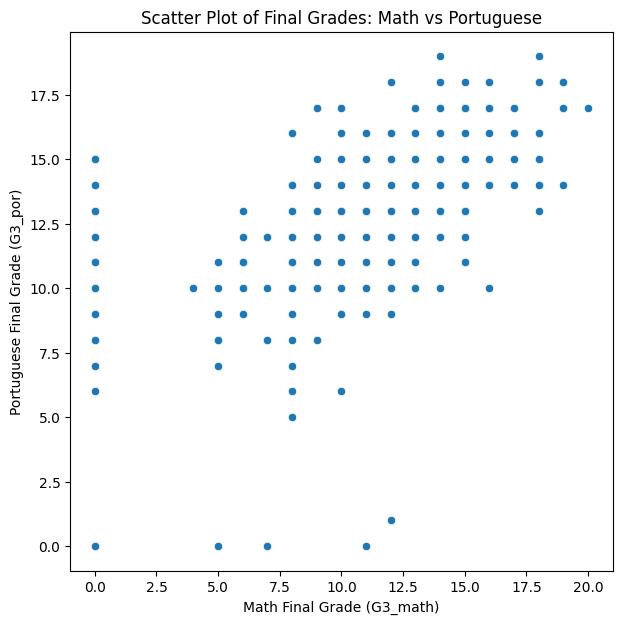

In [27]:
#Scatter plot comparing final grades in Math and Portuguese
plt.figure(figsize=(7, 7))
sns.scatterplot(x='G3_math', y='G3_por', data=merged)
plt.title('Scatter Plot of Final Grades: Math vs Portuguese')
plt.xlabel('Math Final Grade (G3_math)')
plt.ylabel('Portuguese Final Grade (G3_por)')
plt.show()

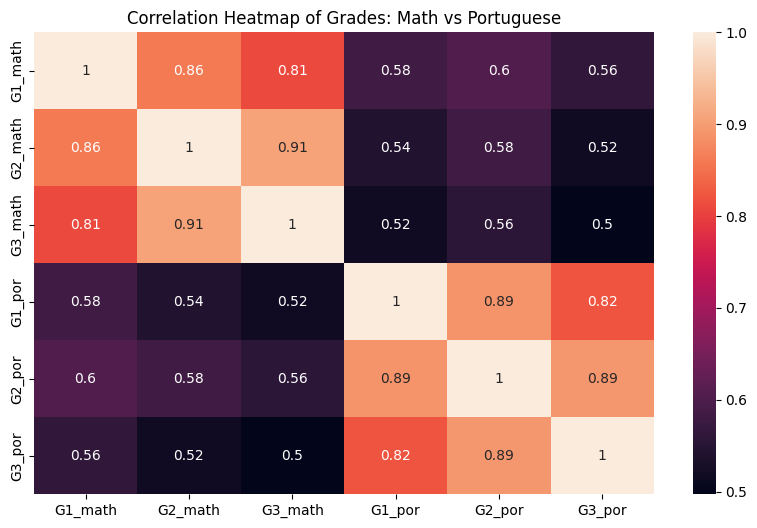

In [28]:
#Correlation heatmap of grades G1, G2, G3 in Math and Portuguese
plt.figure(figsize=(10, 6))
grade_cols = ['G1_math', 'G2_math', 'G3_math', 'G1_por', 'G2_por', 'G3_por']
corr = merged[grade_cols].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap of Grades: Math vs Portuguese')
plt.show()

In [29]:
merged['G1_avg'] = (merged['G1_math'] + merged['G1_por']) / 2
merged['G2_avg'] = (merged['G2_math'] + merged['G2_por']) / 2
merged['G3_avg'] = (merged['G3_math'] + merged['G3_por']) / 2

merged['G3_diff'] = merged['G3_math'] - merged['G3_por']

merged['absences_total'] = merged['absences_math'] + merged['absences_por']

merged['famsup_math_bin'] = merged['famsup_math'].map({'yes':1, 'no':0})
merged['famsup_por_bin'] = merged['famsup_por'].map({'yes':1, 'no':0})
merged['family_support_count'] = merged['famsup_math_bin'] + merged['famsup_por_bin']

Text(0, 0.5, 'Average Final Grade')

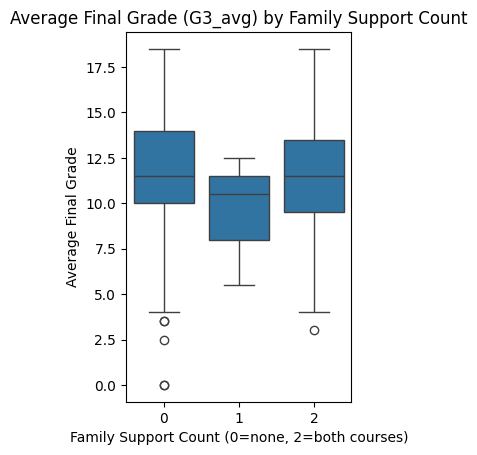

In [30]:
#Boxplot of average final grades by family support count
plt.subplot(1, 2, 1)
sns.boxplot(x='family_support_count', y='G3_avg', data=merged)
plt.title('Average Final Grade (G3_avg) by Family Support Count')
plt.xlabel('Family Support Count (0=none, 2=both courses)')
plt.ylabel('Average Final Grade')

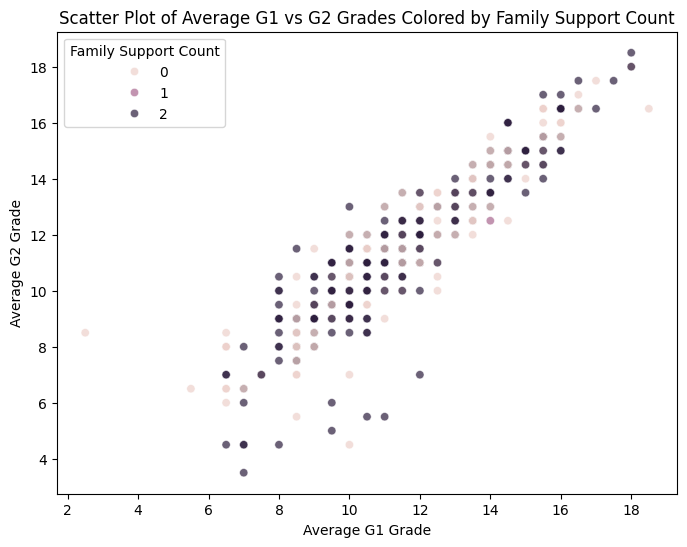

In [31]:
#Scatter plot of average G1 vs G2 grades colored by family support count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='G1_avg', y='G2_avg', hue='family_support_count', data=merged, alpha=0.7)
plt.title('Scatter Plot of Average G1 vs G2 Grades Colored by Family Support Count')
plt.xlabel('Average G1 Grade')
plt.ylabel('Average G2 Grade')
plt.legend(title='Family Support Count')
plt.show()

In [32]:
selected_features_regression = ['sex','age','reason','studytime','failures','schoolsup','famsup','paid','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
selected_features_classification = ['sex','age','reason','studytime','failures','schoolsup','famsup','paid','activities','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','g1_pass','g2_pass']

In [33]:
categorical_features = ['sex', 'reason', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']

df_encoded_mat = mat.copy()
df_encoded_por = por.copy()

le = LabelEncoder()

for col in categorical_features:
    df_encoded_mat[col] = le.fit_transform(df_encoded_mat[col])

for col in categorical_features:
    df_encoded_por[col] = le.fit_transform(df_encoded_por[col])

for df in [df_encoded_mat, df_encoded_por]:
    df['g1_pass'] = (df['G1'] >= 10).astype(int)
    df['g2_pass'] = (df['G2'] >= 10).astype(int)
    df['g3_pass'] = (df['G3'] >= 10).astype(int)

In [34]:
X_mat_reg = df_encoded_mat[selected_features_regression]
y_mat_reg = df_encoded_mat['G3']
X_por_reg = df_encoded_por[selected_features_regression]
y_por_reg = df_encoded_por['G3']

In [35]:
X_mat_cla = df_encoded_mat[selected_features_classification]
y_mat_cla = df_encoded_mat['g3_pass']
X_por_cla = df_encoded_por[selected_features_classification]
y_por_cla = df_encoded_por['g3_pass']

In [36]:
scaler = StandardScaler()

X_mat_reg_scaled = scaler.fit_transform(X_mat_reg)
X_por_reg_scaled = scaler.fit_transform(X_por_reg)
X_mat_cla_scaled = scaler.fit_transform(X_mat_cla)
X_por_cla_scaled = scaler.fit_transform(X_por_cla)

In [37]:
model_scores_regression = {'Model': [], 'Dataset': [], 'Method': [], 'RMSE': [], 'R^2': [], 'Training Time': []}

In [38]:
model_scores_classification = {'Model': [], 'Dataset': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Training Time': []}

In [39]:
def evaluate_regression_model_cv(model, X, y, model_name, dataset_name, k=10):

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []
    r2_scores = []
    times = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)
        times.append(end - start)

    model_scores_regression['Model'].append(model_name)
    model_scores_regression['Dataset'].append(dataset_name)
    model_scores_regression['Method'].append('Cross Validation')
    model_scores_regression['RMSE'].append(np.mean(rmse_scores))
    model_scores_regression['R^2'].append(np.mean(r2_scores))
    model_scores_regression['Training Time'].append(np.mean(times))

In [40]:
def evaluate_regression_model_tt(model, X, y, model_name, dataset_name, test_size=0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    time_taken = end - start

    model_scores_regression['Model'].append(model_name)
    model_scores_regression['Dataset'].append(dataset_name)
    model_scores_regression['Method'].append('Train-Test Split')
    model_scores_regression['RMSE'].append(rmse)
    model_scores_regression['R^2'].append(r2)
    model_scores_regression['Training Time'].append(time_taken)

In [41]:
def evaluate_classification_model(model, X, y, model_name, dataset_name, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accs, precs, recs, f1s, times = [], [], [], [], []
    sc = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
    precs_weighted, recs_weighted, f1s_weighted = [], [], []

    for train_idx, test_idx in kf.split(X):
        if isinstance(X, pd.DataFrame):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        else:
            X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        y_pred = model.predict(X_test)

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        precs_weighted.append(precision_score(y_test, y_pred, average='weighted'))
        recs_weighted.append(recall_score(y_test, y_pred, average='weighted'))
        f1s_weighted.append(f1_score(y_test, y_pred, average='weighted'))
        times.append(end - start)

    model_scores_classification['Model'].append(model_name)
    model_scores_classification['Dataset'].append(dataset_name)
    model_scores_classification['Accuracy'].append(np.mean(accs))
    model_scores_classification['Precision'].append(np.mean(precs))
    model_scores_classification['Recall'].append(np.mean(recs))
    model_scores_classification['F1-Score'].append(np.mean(f1s))
    model_scores_classification['Training Time'].append(np.mean(times))

    for metric in sc:
        if metric == 'accuracy':
            scores = accs
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'precision_macro':
            scores = precs
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'recall_macro':
            scores = recs
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'f1_macro':
            scores = f1s
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'precision_weighted':
            scores = precs_weighted
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'recall_weighted':
            scores = recs_weighted
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2))
        elif metric == 'f1_weighted':
            scores = f1s_weighted
            print(metric,": %0.3f (+/-%0.2f)" % (np.mean(scores), np.std(scores) * 2) + '\n')


In [42]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
pr = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [43]:
evaluate_regression_model_cv(lr, X_mat_reg_scaled, y_mat_reg.values, 'Linear Regression', 'Math')
evaluate_regression_model_cv(lr, X_por_reg_scaled, y_por_reg.values, 'Linear Regression', 'Portuguese')
evaluate_regression_model_tt(lr, X_mat_reg_scaled, y_mat_reg.values, 'Linear Regression', 'Math')
evaluate_regression_model_tt(lr, X_por_reg_scaled, y_por_reg.values, 'Linear Regression', 'Portuguese')

In [44]:
evaluate_regression_model_cv(dt, X_mat_reg_scaled, y_mat_reg.values, 'Decision Tree', 'Math')
evaluate_regression_model_cv(dt, X_por_reg_scaled, y_por_reg.values, 'Decision Tree', 'Portuguese')
evaluate_regression_model_tt(dt, X_mat_reg_scaled, y_mat_reg.values, 'Decision Tree', 'Math')
evaluate_regression_model_tt(dt, X_por_reg_scaled, y_por_reg.values, 'Decision Tree', 'Portuguese')

In [45]:
evaluate_regression_model_cv(pr, X_mat_reg_scaled, y_mat_reg.values, 'Polynomial Regression', 'Math')
evaluate_regression_model_cv(pr, X_por_reg_scaled, y_por_reg.values, 'Polynomial Regression', 'Portuguese')
evaluate_regression_model_tt(pr, X_mat_reg_scaled, y_mat_reg.values, 'Polynomial Regression', 'Math')
evaluate_regression_model_tt(pr, X_por_reg_scaled, y_por_reg.values, 'Polynomial Regression', 'Portuguese')

In [46]:
print("Naive Bayes (Gaussian): \n")
evaluate_classification_model(GaussianNB(), X_mat_cla_scaled, y_mat_cla, 'Naive Bayes (Gaussian)', 'Math')
print("Naive Bayes (Multinomial): \n")
evaluate_classification_model(MultinomialNB(), X_mat_cla, y_mat_cla, 'Naive Bayes (Multinomial)', 'Math')
print("KNN (k=3) : \n")
evaluate_classification_model(KNeighborsClassifier(n_neighbors=3), X_mat_cla_scaled, y_mat_cla, 'KNN (k=3)', 'Math')
print("KNN (k=5): \n")
evaluate_classification_model(KNeighborsClassifier(n_neighbors=5), X_mat_cla_scaled, y_mat_cla, 'KNN (k=5)', 'Math')
print("Logistic Regression: \n")
evaluate_classification_model(LogisticRegression(max_iter=1000, random_state=42), X_mat_cla_scaled, y_mat_cla, 'Logistic Regression', 'Math')
print("Support Vector Machines: \n")
evaluate_classification_model(SVC(kernel='linear'), X_mat_cla_scaled, y_mat_cla, 'SVM', 'Math')

Naive Bayes (Gaussian): 

accuracy : 0.896 (+/-0.09)
precision_macro : 0.958 (+/-0.07)
precision_weighted : 0.909 (+/-0.07)
recall_macro : 0.889 (+/-0.10)
recall_weighted : 0.896 (+/-0.09)
f1_macro : 0.921 (+/-0.06)
f1_weighted : 0.899 (+/-0.09)

Naive Bayes (Multinomial): 

accuracy : 0.797 (+/-0.07)
precision_macro : 0.817 (+/-0.14)
precision_weighted : 0.803 (+/-0.07)
recall_macro : 0.904 (+/-0.08)
recall_weighted : 0.797 (+/-0.07)
f1_macro : 0.855 (+/-0.06)
f1_weighted : 0.790 (+/-0.09)

KNN (k=3) : 

accuracy : 0.856 (+/-0.10)
precision_macro : 0.883 (+/-0.10)
precision_weighted : 0.862 (+/-0.10)
recall_macro : 0.901 (+/-0.12)
recall_weighted : 0.856 (+/-0.10)
f1_macro : 0.891 (+/-0.09)
f1_weighted : 0.855 (+/-0.09)

KNN (k=5): 

accuracy : 0.868 (+/-0.09)
precision_macro : 0.886 (+/-0.12)
precision_weighted : 0.880 (+/-0.07)
recall_macro : 0.928 (+/-0.12)
recall_weighted : 0.868 (+/-0.09)
f1_macro : 0.903 (+/-0.06)
f1_weighted : 0.867 (+/-0.08)

Logistic Regression: 

accuracy : 

In [47]:
print("Naive Bayes (Gaussian): \n")
evaluate_classification_model(GaussianNB(), X_por_cla_scaled, y_por_cla, 'Naive Bayes (Gaussian)', 'Portuguese')
print("Naive Bayes (Multinomial): \n")
evaluate_classification_model(MultinomialNB(), X_por_cla, y_por_cla, 'Naive Bayes (Multinomial)', 'Portuguese')
print("KNN (k=3) : \n")
evaluate_classification_model(KNeighborsClassifier(n_neighbors=3), X_por_cla_scaled, y_por_cla, 'KNN (k=3)', 'Portuguese')
print("KNN (k=5) : \n")
evaluate_classification_model(KNeighborsClassifier(n_neighbors=5), X_por_cla_scaled, y_por_cla, 'KNN (k=5)', 'Portuguese')
print("Logistic Regression: \n")
evaluate_classification_model(LogisticRegression(max_iter=1000, random_state=42), X_por_cla_scaled, y_por_cla, 'Logistic Regression', 'Portuguese')
print("Support Vector Machines: \n")
evaluate_classification_model(SVC(kernel='linear'), X_por_cla_scaled, y_por_cla, 'SVM', 'Portuguese')

Naive Bayes (Gaussian): 

accuracy : 0.889 (+/-0.08)
precision_macro : 0.971 (+/-0.05)
precision_weighted : 0.922 (+/-0.04)
recall_macro : 0.898 (+/-0.11)
recall_weighted : 0.889 (+/-0.08)
f1_macro : 0.932 (+/-0.05)
f1_weighted : 0.898 (+/-0.07)

Naive Bayes (Multinomial): 

accuracy : 0.874 (+/-0.07)
precision_macro : 0.910 (+/-0.07)
precision_weighted : 0.871 (+/-0.08)
recall_macro : 0.944 (+/-0.06)
recall_weighted : 0.874 (+/-0.07)
f1_macro : 0.926 (+/-0.05)
f1_weighted : 0.869 (+/-0.08)

KNN (k=3) : 

accuracy : 0.903 (+/-0.08)
precision_macro : 0.930 (+/-0.06)
precision_weighted : 0.905 (+/-0.07)
recall_macro : 0.957 (+/-0.08)
recall_weighted : 0.903 (+/-0.08)
f1_macro : 0.943 (+/-0.05)
f1_weighted : 0.900 (+/-0.08)

KNN (k=5) : 

accuracy : 0.901 (+/-0.08)
precision_macro : 0.923 (+/-0.08)
precision_weighted : 0.901 (+/-0.09)
recall_macro : 0.964 (+/-0.06)
recall_weighted : 0.901 (+/-0.08)
f1_macro : 0.942 (+/-0.05)
f1_weighted : 0.895 (+/-0.09)

Logistic Regression: 

accuracy :

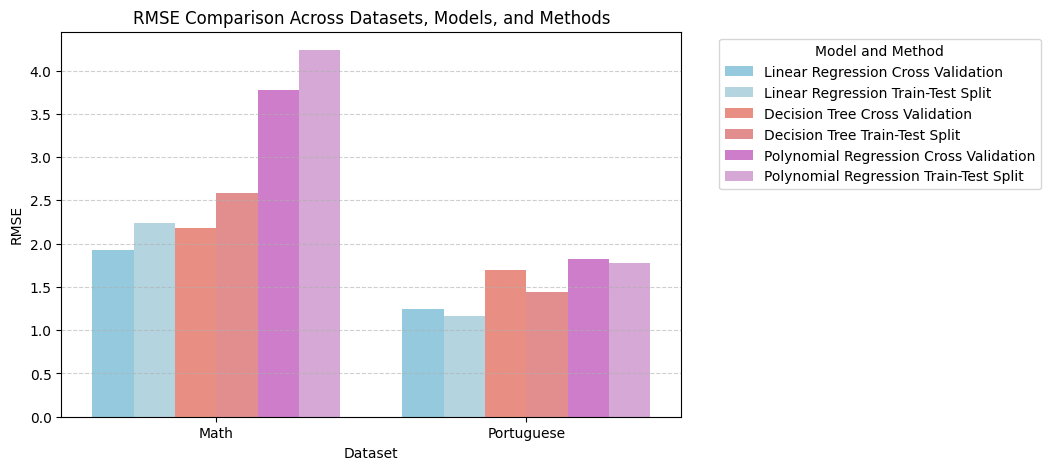

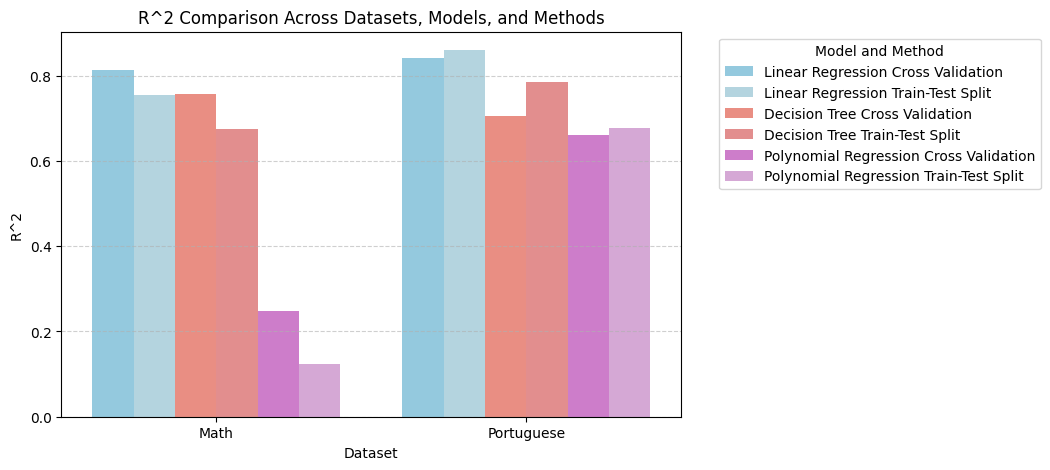

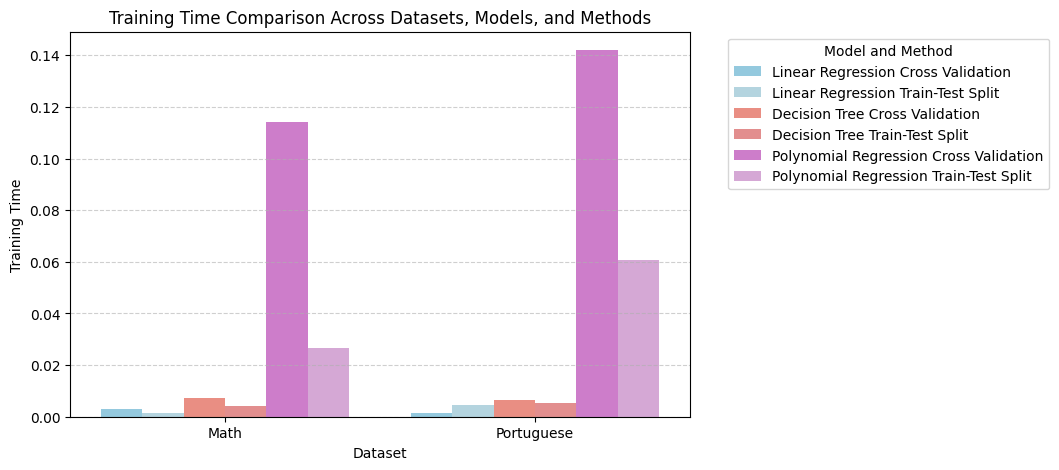

In [54]:
scores_df_reg = pd.DataFrame(model_scores_regression)

scores_df_reg['Model_Method'] = scores_df_reg['Model'] + ' ' + scores_df_reg['Method']

model_method_color_map = {'Linear Regression Cross Validation': 'skyblue','Linear Regression Train-Test Split': 'lightblue','Decision Tree Cross Validation': 'salmon','Decision Tree Train-Test Split': 'lightcoral','Polynomial Regression Cross Validation': 'orchid','Polynomial Regression Train-Test Split': 'plum'}

metrics_reg = ['RMSE', 'R^2', 'Training Time']

for metric in metrics_reg:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Dataset', y=metric, hue='Model_Method', data=scores_df_reg, palette=model_method_color_map)
    plt.title(metric + ' Comparison Across Datasets, Models, and Methods')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Model and Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

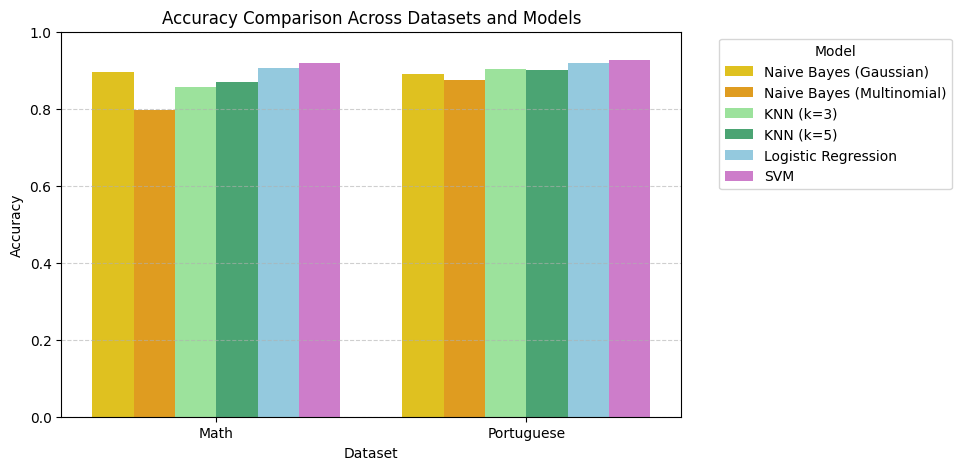

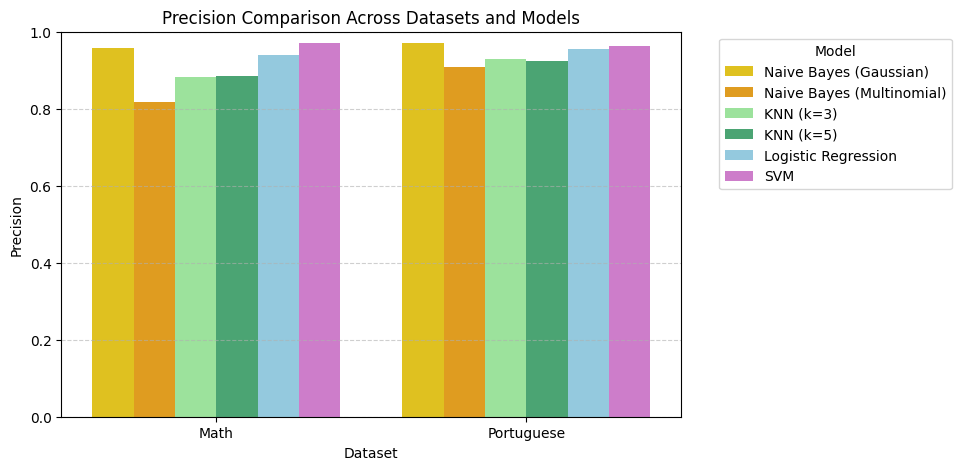

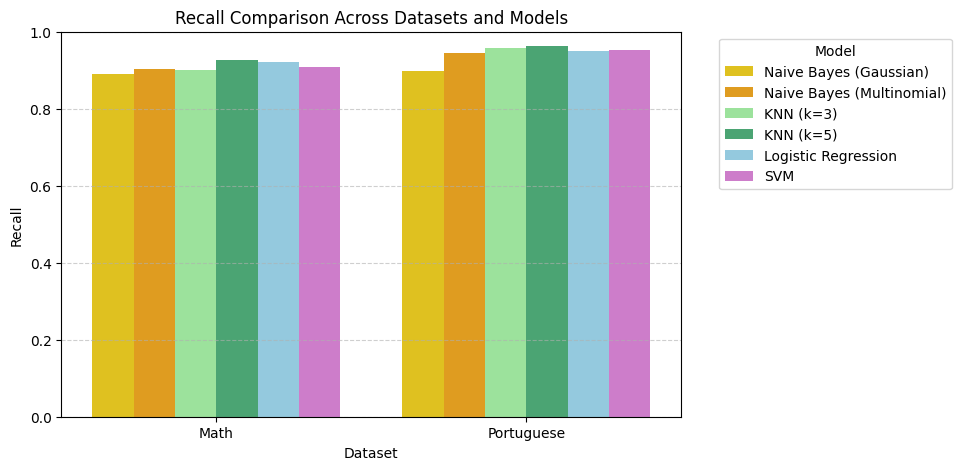

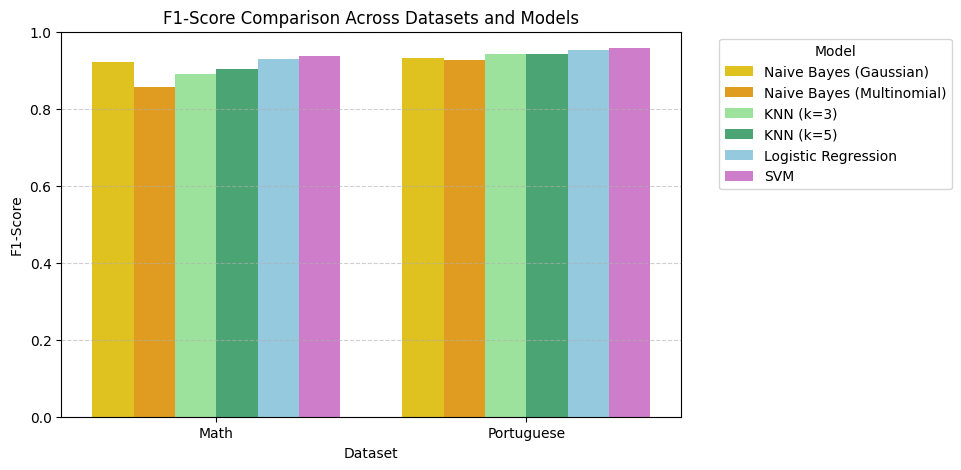

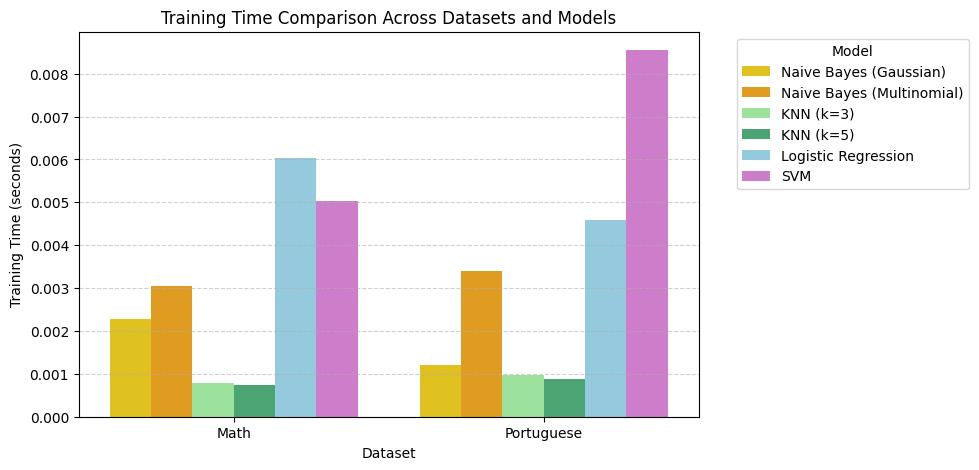

In [56]:
scores_df_cla = pd.DataFrame(model_scores_classification)

model_color_map_cla = {'Naive Bayes (Gaussian)': 'gold', 'Naive Bayes (Multinomial)': 'orange', 'Logistic Regression': 'skyblue','KNN (k=3)': 'lightgreen','KNN (k=5)': 'mediumseagreen', 'SVM': 'orchid'}

model_colors_cla = [model_color_map_cla[model] for model in scores_df_cla['Model']]

metrics_cla = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for metric in metrics_cla:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Dataset', y=metric, hue='Model', data=scores_df_cla, palette=model_color_map_cla)
    plt.title(metric + ' Comparison Across Datasets and Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Dataset', y='Training Time', hue='Model', data=scores_df_cla, palette=model_color_map_cla)
plt.title('Training Time Comparison Across Datasets and Models')
plt.ylabel('Training Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Analyzing the result

# Write your conclusions here and answer the following questions
a) Which of the employed algorithms has the best performance (F-Score).
  
  SVM

b) What is the time taken to train each model

  Shown in graphs above

c) Which algorithm would you select to solve the problem and why

  Regression: Linear Regression for both datasets as it gives us better scores across all metrics (RMSE, R^2 and Time)

  Classification: SVM for both datasets as it usually is at the top or right behind the best metric in all metrics except time; however, the time taken for this problem is negligable but for other problems, which may have larger datasets, another option could be a better choice